# K-Means Clustering Algorithm

---

The following code will use Scikit-learn's make_blobs function which will generate synthetic datasets for this dataset. Isotropic Gaussian blobs of data points will be created which will ensure that the points within each cluster are distributed according to a Gaussian/normal distribution.

make_blobs [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

In [167]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


Create the data using make_blobs and initializing the dataset to have 5 centers while assigning the same number of clusters.

In [168]:
X, y = make_blobs(n_samples=2000, centers=5, n_features=5, random_state=100, cluster_std=2.5)
np.shape(X)


(2000, 5)

In [169]:
def colors(y):
    if y == 0:
        return 'red'
    elif y == 1:
        return 'lightseagreen'
    elif y == 2: 
        return 'magenta'
    elif y == 3:
        return 'orange'
    elif y == 4:
        return 'purple'
    else:
        return 'blue'
c = [colors(label) for label in y]

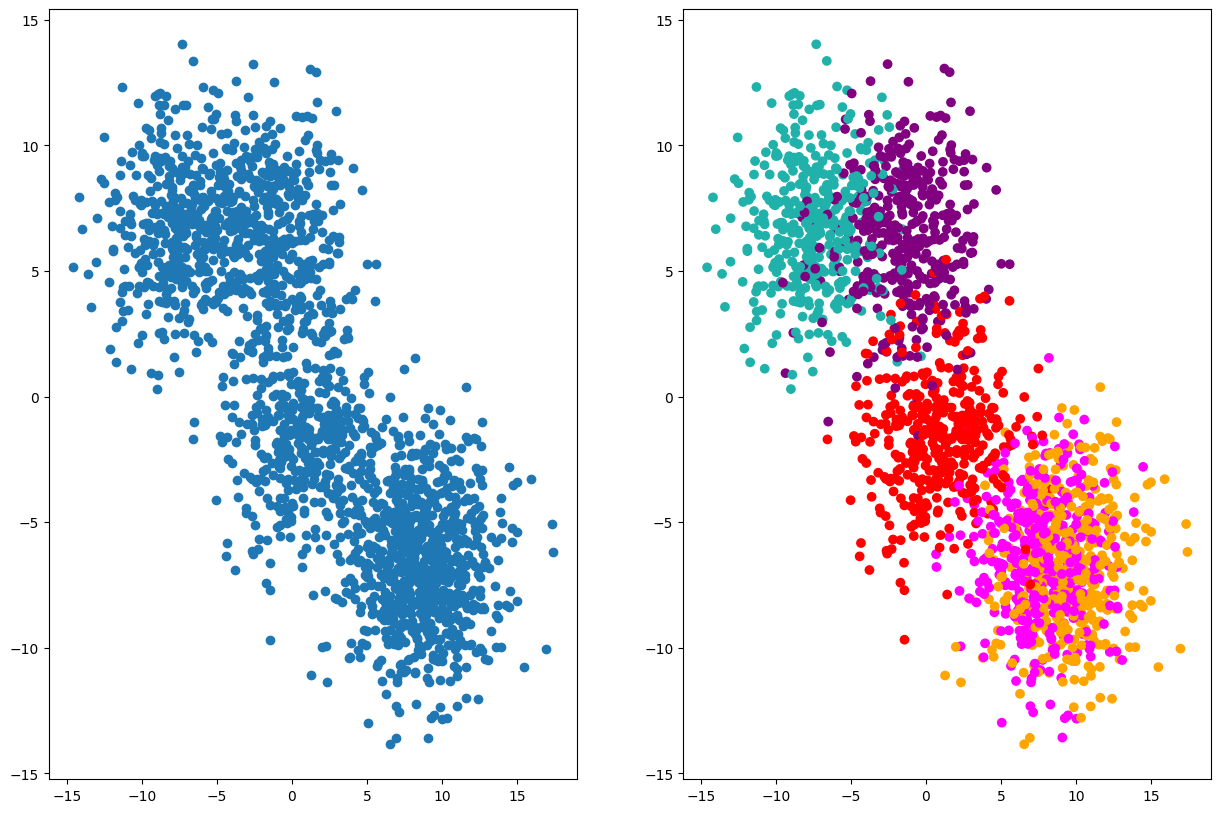

In [170]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.scatter(X[:, 0], X[:, 2])
ax2.scatter(X[:, 0], X[:, 2], c=c)
plt.show()

In [171]:
k = 5
centroids = []
for k in range(k):
    i = np.random.randint(0, 100)
    point = (X[i, 0], X[i,1], X[i,2], X[i,3], k)
    centroids.append(point)

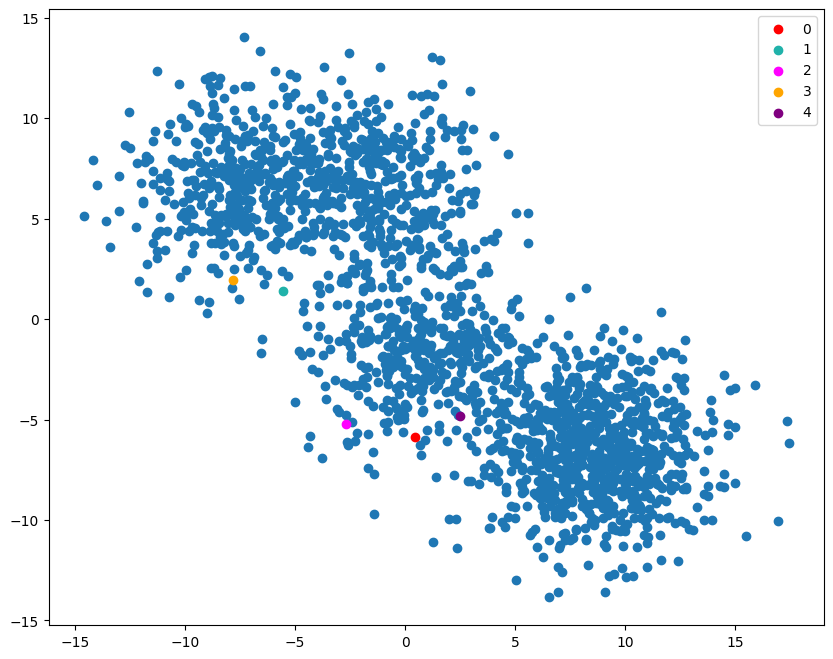

In [172]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 2])
plt.scatter([centroids[0][0]], [centroids[0][1]], color = "red", label = centroids[0][4])
plt.scatter([centroids[1][0]], [centroids[1][1]], color = "lightseagreen", label = centroids[1][4])
plt.scatter([centroids[2][0]], [centroids[2][1]], color = "magenta", label = centroids[2][4])
plt.scatter([centroids[3][0]], [centroids[3][1]], color = "orange", label = centroids[3][4])
plt.scatter([centroids[4][0]], [centroids[4][1]], color = "purple", label = centroids[4][4])
plt.legend()
plt.show()

In [173]:
def distance(i, X, centroid):
    return np.sqrt(sum((X[i,j] - centroid[j])**2 for j in range(2)))

In [174]:
def assign_label(i, X, centroids):
    distances = np.array([distance(i, X, centroid) for centroid in centroids])
    label = np.argmin(distances)
    return label

In [175]:
def assign_clusters(X, centroids):
    return [assign_label(i, X, centroids) for i in range(len(X))]

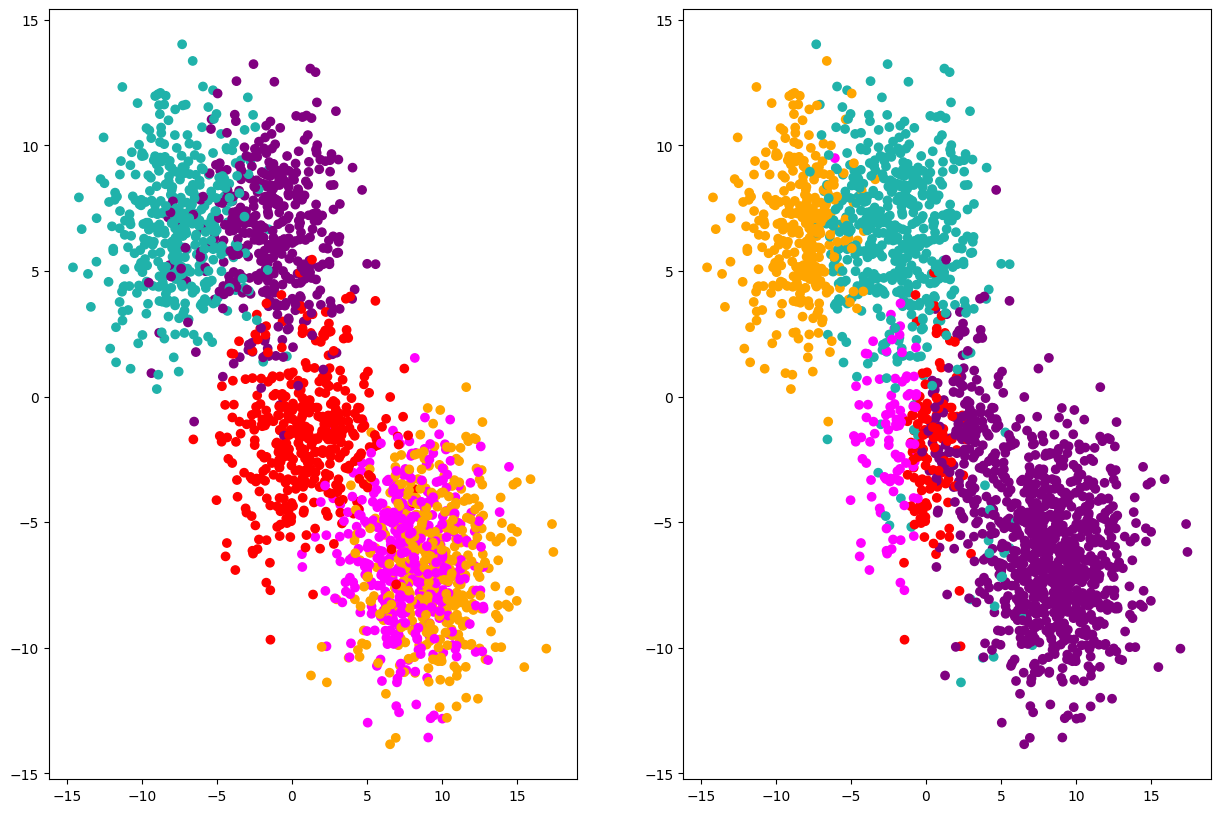

In [176]:
current_labels = assign_clusters(X, centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.scatter(X[:, 0], X[:, 2], c=c)

ax2.scatter(X[:, 0], X[:, 2], c=current_colors)
ax2.scatter([centroids[0][0]], [centroids[0][1]], color = "red", label = centroids[0][4])
ax2.scatter([centroids[1][0]], [centroids[1][1]], color = "lightseagreen", label = centroids[1][4])
ax2.scatter([centroids[2][0]], [centroids[2][1]], color = "magenta", label = centroids[2][4])
ax2.scatter([centroids[3][0]], [centroids[3][1]], color = "orange", label = centroids[3][4])
ax2.scatter([centroids[4][0]], [centroids[4][1]], color = "purple", label = centroids[4][4])

plt.show()

In [177]:
def update_centroid(X, centroids):
    current_labels = assign_clusters(X, centroids)
    k = len(centroids)
    centroid_means = {i : [0,0] for i in range(k)}
    for i in range(len(X)):
        centroid_means[current_labels[i]][0] += X[i][0]
        centroid_means[current_labels[i]][1] += X[i][1]
    for i in range(k):
        num_occur = current_labels.count(i)
        centroid_means[i][0] = centroid_means[i][0]/num_occur
        centroid_means[i][1] = centroid_means[i][1]/num_occur
    return [centroid_means[i] + [i] for i in range(k)]


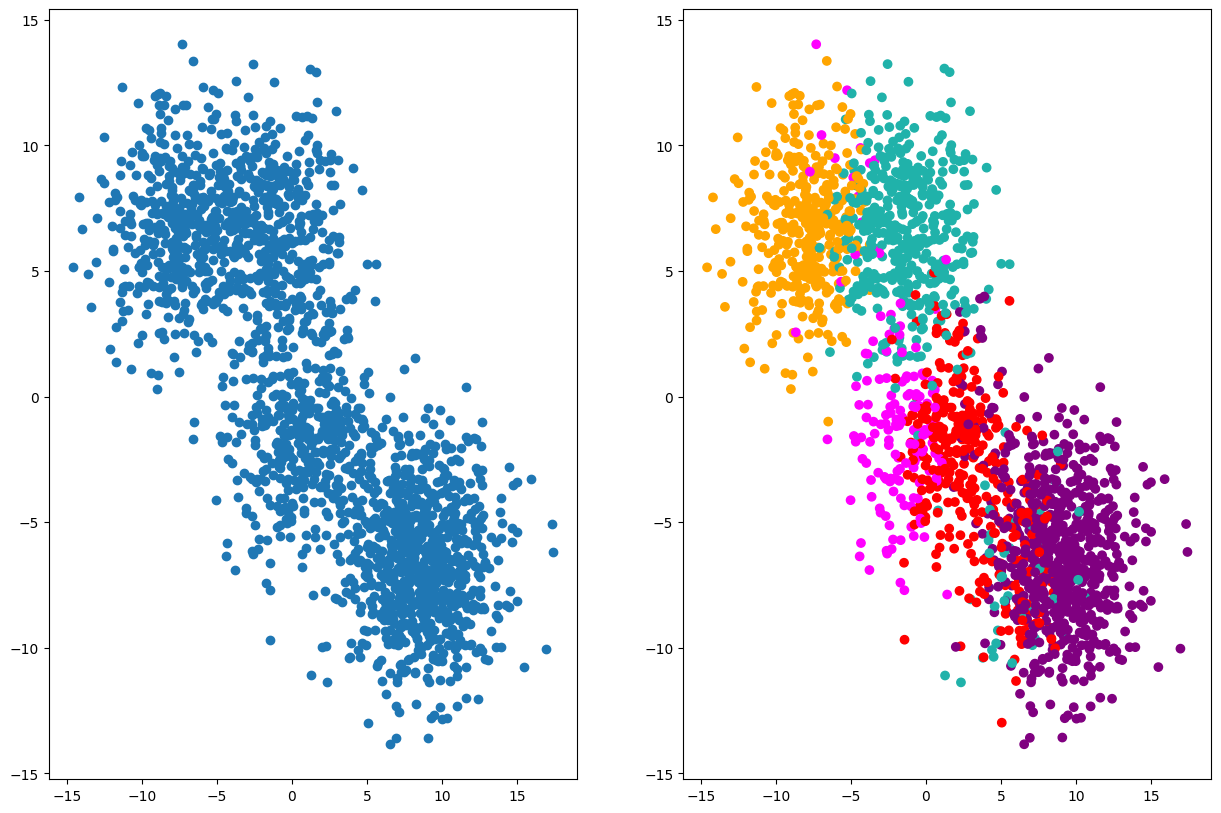

In [178]:
new_centers = update_centroid(X, centroids)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.scatter(X[:, 0], X[:, 2])
ax2.scatter(X[:, 0], X[:, 2], c=current_colors)
plt.show()

/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3

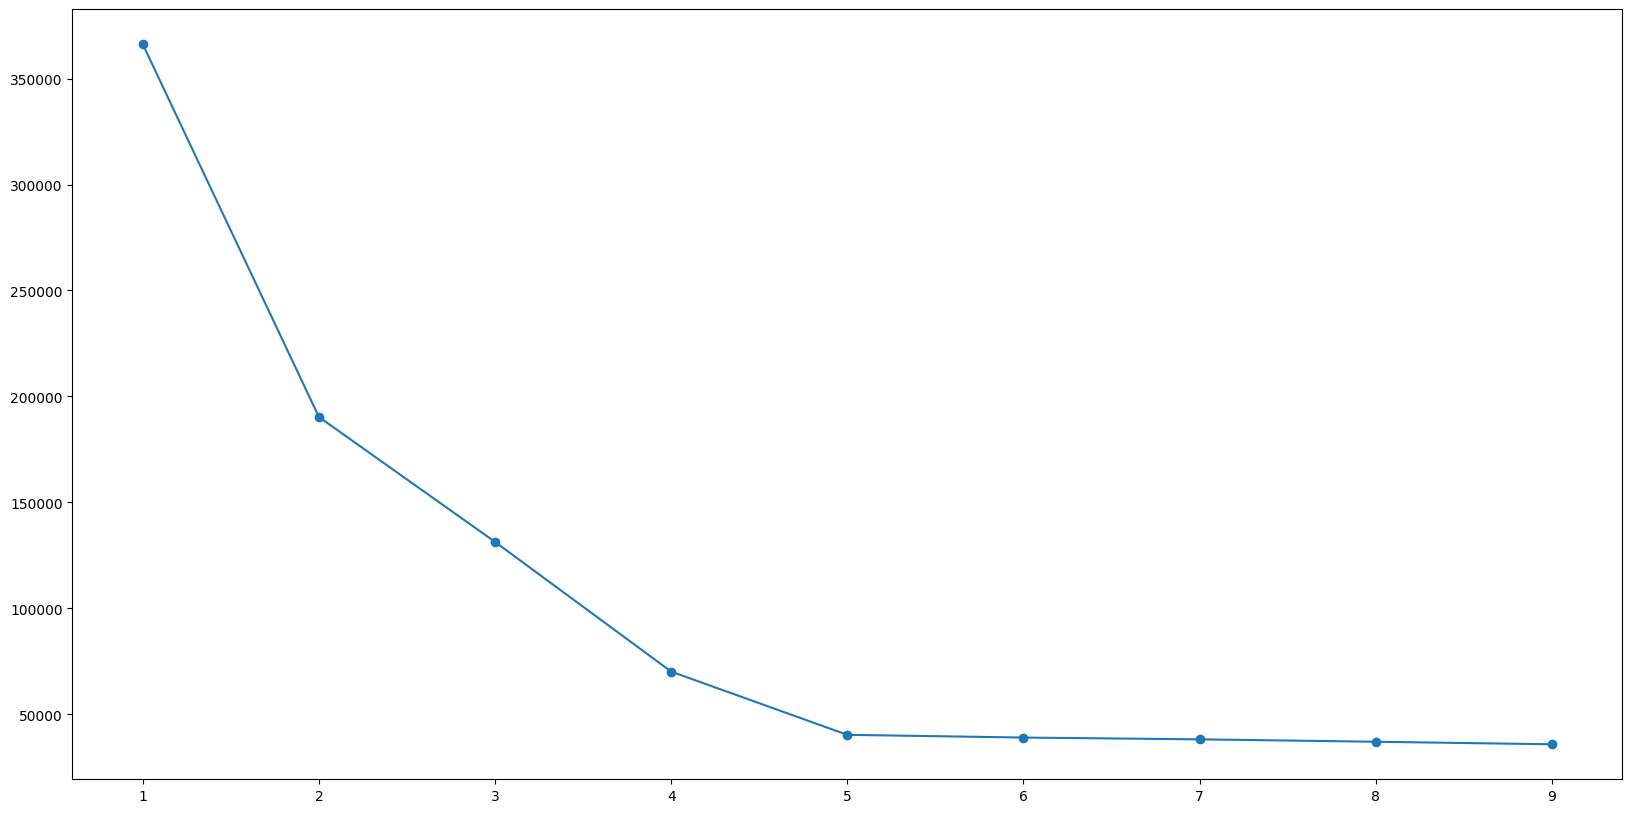

In [179]:
X, y = make_blobs(n_samples=2000, centers=5, n_features=5, random_state=100, cluster_std=2)
all_score = []

for i in range(1,10):
    km = KMeans(n_clusters=i, random_state=100)
    km.fit(X)
    all_score.append(-km.score(X))

plt.figure(figsize=(20, 10))
plt.plot(range(1,10), all_score)
plt.scatter(range(1,10), all_score)
plt.show()
